# EXPERIMENT NO 6

## SENTIMENT ANALYSIS

### IMPORTING THE LIBRARIES

In [1]:
# utilities
import re
import numpy as np
import pandas as pd
import nltk

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
from nltk.stem import WordNetLemmatizer

# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

### READING & PROCESSING THE DATASET

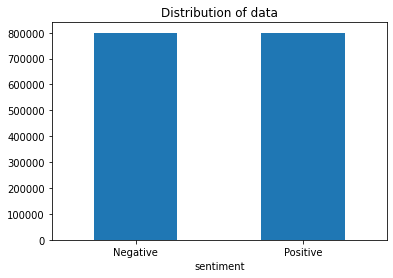

In [30]:
# Importing the dataset
DATASET_COLUMNS = ["sentiment", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
dataset = pd.read_csv(
    '/DOCUMENTS/training.1600000.processed.noemoticon.csv/training.1600000.processed.noemoticon.csv,
    encoding=DATASET_ENCODING,
    names=DATASET_COLUMNS)

# Removing the unnecessary columns.
dataset = dataset[['sentiment', 'text']]
# Replacing the values to ease understanding.
dataset['sentiment'] = dataset['sentiment'].replace(4, 1)

# Plotting the distribution for dataset.
ax = dataset.groupby('sentiment').count().plot(kind='bar',
                                               title='Distribution of data',
                                               legend=False)
ax.set_xticklabels(['Negative', 'Positive'], rotation=0)

# Storing data in lists.
text, sentiment = list(dataset['text']), list(dataset['sentiment'])

### PREPROCESSING THE DATA

1. Lower Casing
2. Replacing URL`s
3. Replacing Emojis
4. Replacing Usernames
5. Removing Non-Alphabets
6. Removing Consecutive letters"Heyyyy" to "Heyy")*
7. Removing Short Words
8. Removing Stopwords
9. Lemmatizing

In [31]:
# Defining dictionary containing all emojis with their meanings.
emojis = {
    ':)': 'smile',
    ':-)': 'smile',
    ';d': 'wink',
    ':-E': 'vampire',
    ':(': 'sad',
    ':-(': 'sad',
    ':-<': 'sad',
    ':P': 'raspberry',
    ':O': 'surprised',
    ':-@': 'shocked',
    ':@': 'shocked',
    ':-$': 'confused',
    ':\\': 'annoyed',
    ':#': 'mute',
    ':X': 'mute',
    ':^)': 'smile',
    ':-&': 'confused',
    '$_$': 'greedy',
    '@@': 'eyeroll',
    ':-!': 'confused',
    ':-D': 'smile',
    ':-0': 'yell',
    'O.o': 'confused',
    '<(-_-)>': 'robot',
    'd[-_-]b': 'dj',
    ":'-)": 'sadsmile',
    ';)': 'wink',
    ';-)': 'wink',
    'O:-)': 'angel',
    'O*-)': 'angel',
    '(:-D': 'gossip',
    '=^.^=': 'cat'
}

# Defining set containing all stopwords in english.
stopwordlist = [
    'a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an', 'and',
    'any', 'are', 'as', 'at', 'be', 'because', 'been', 'before', 'being',
    'below', 'between', 'both', 'by', 'can', 'd', 'did', 'do', 'does', 'doing',
    'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'has',
    'have', 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself',
    'his', 'how', 'i', 'if', 'in', 'into', 'is', 'it', 'its', 'itself', 'just',
    'll', 'm', 'ma', 'me', 'more', 'most', 'my', 'myself', 'now', 'o', 'of',
    'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out',
    'own', 're', 's', 'same', 'she', "shes", 'should', "shouldve", 'so',
    'some', 'such', 't', 'than', 'that', "thatll", 'the', 'their', 'theirs',
    'them', 'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
    'through', 'to', 'too', 'under', 'until', 'up', 've', 'very', 'was', 'we',
    'were', 'what', 'when', 'where', 'which', 'while', 'who', 'whom', 'why',
    'will', 'with', 'won', 'y', 'you', "youd", "youll", "youre", "youve",
    'your', 'yours', 'yourself', 'yourselves'
].append(nltk.corpus.stopwords.words())

In [32]:
def preprocess(textdata):
    processedText = []

    # Create Lemmatizer and Stemmer.
    wordLemm = WordNetLemmatizer()

    # Defining regex patterns.
    urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern = '@[^\s]+'
    alphaPattern = "[^a-zA-Z0-9]"
    sequencePattern = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"

    for tweet in textdata:
        tweet = tweet.lower()

        # Replace all URls with 'URL'
        tweet = re.sub(urlPattern, ' URL', tweet)
        # Replace all emojis.
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])
        # Replace @USERNAME to 'USER'.
        tweet = re.sub(userPattern, ' USER', tweet)
        # Replace all non alphabets.
        tweet = re.sub(alphaPattern, " ", tweet)
        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

        tweetwords = ''
        for word in tweet.split():
            # Checking if the word is a stopword.
            # if word not in stopwordlist:
            if len(word) > 1:
                # Lemmatizing the word.
                word = wordLemm.lemmatize(word)
                tweetwords += (word + ' ')

        processedText.append(tweetwords)

    return processedText

In [33]:
processedtext = preprocess(text)
print(f'Text Preprocessing complete.')

Text Preprocessing complete.


### WORD CLOUD OF +VE & -VE TWEETS

#### Word-Cloud for Negative tweets.

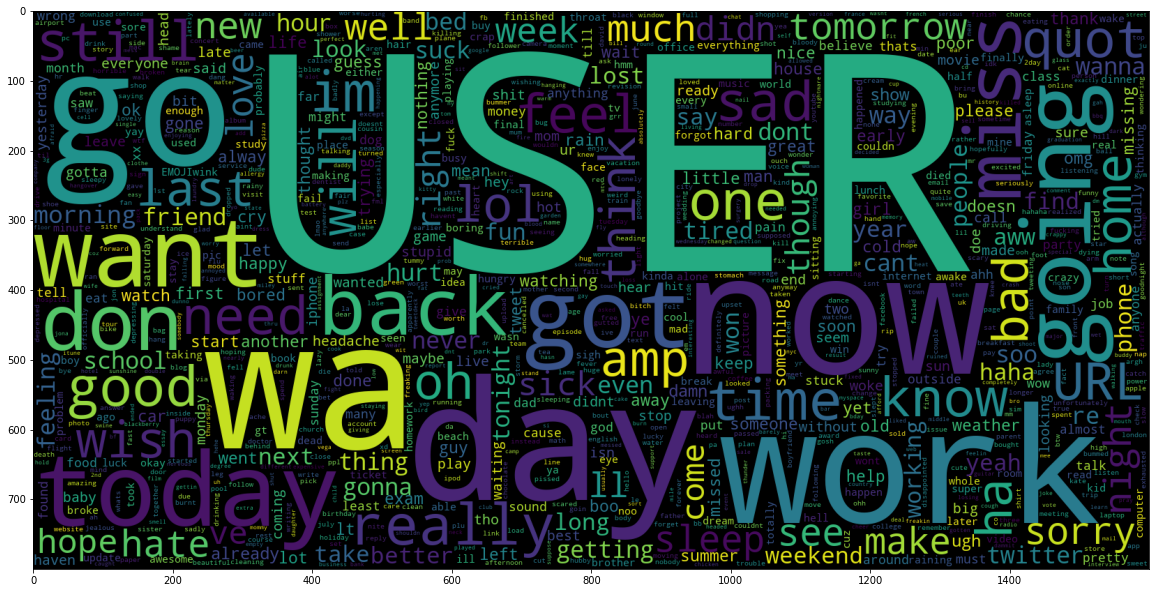

In [34]:
data_neg = processedtext[:800000]
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=1000, width=1600, height=800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

#### Word-Cloud for Positive tweets.

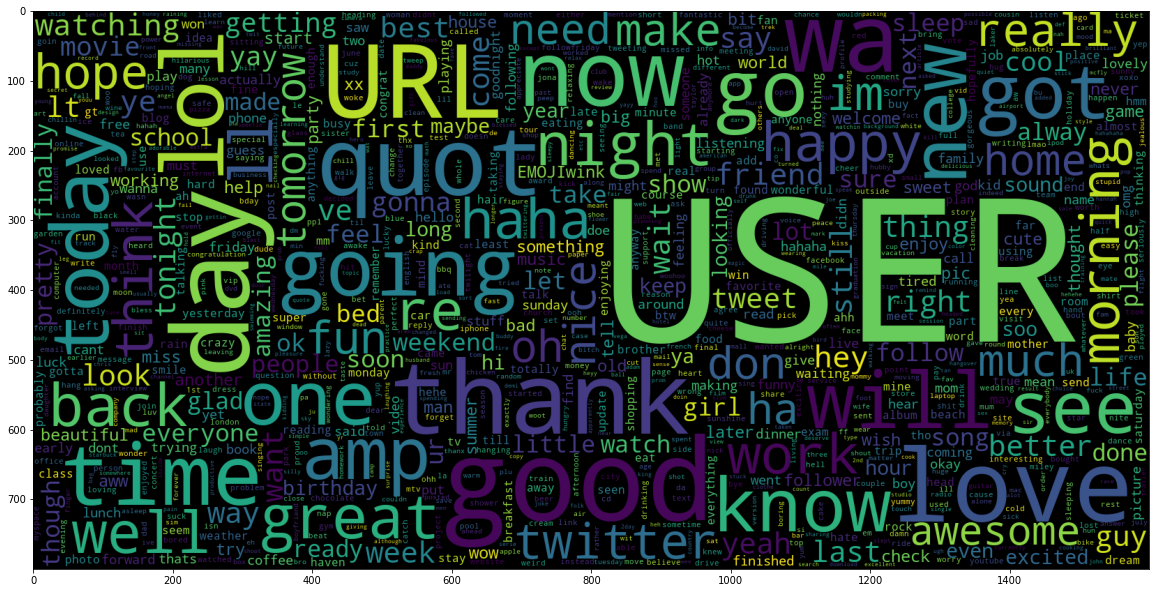

In [35]:
data_pos = processedtext[800000:]
wc = WordCloud(max_words=1000, width=1600, height=800,
               collocations=False).generate(" ".join(data_pos))
plt.figure(figsize=(20, 20))
plt.imshow(wc)

### SPLITTING THE DATA

In [36]:
X_train, X_test, y_train, y_test = train_test_split(processedtext,
                                                    sentiment,
                                                    test_size=0.05,
                                                    random_state=0)
print(f'Data Split done.')

Data Split done.


#### USING THE TF-IDF

In [37]:
vectoriser = TfidfVectorizer(ngram_range=(1, 2), max_features=500000)
vectoriser.fit(X_train)
print(f'Vectoriser fitted.')
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

Vectoriser fitted.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


No. of feature_words:  500000


#### DATA TRANSFORM (TRAIN & TEST) IN TF-IDF 

In [38]:
X_train = vectoriser.transform(X_train)
X_test = vectoriser.transform(X_test)
print(f'Data Transformed.')

Data Transformed.


### FUNCTION FOR MODEL EVALUATION

In [39]:
def model_Evaluate(model):

    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))

    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories = ['Negative', 'Positive']
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_percentages = [
        '{0:.2%}'.format(value)
        for value in cf_matrix.flatten() / np.sum(cf_matrix)
    ]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    sns.heatmap(cf_matrix,
                annot=labels,
                cmap='Blues',
                fmt='',
                xticklabels=categories,
                yticklabels=categories)

    plt.xlabel("Predicted values", fontdict={'size': 14}, labelpad=10)
    plt.ylabel("Actual values", fontdict={'size': 14}, labelpad=10)
    plt.title("Confusion Matrix", fontdict={'size': 18}, pad=20)

### USING DIFFRENT MODEL AND FINDING ACCYURACY AND CONFUSION MATRIX

#### 1. BernoulliNB Model

              precision    recall  f1-score   support

           0       0.81      0.79      0.80     39989
           1       0.80      0.81      0.80     40011

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



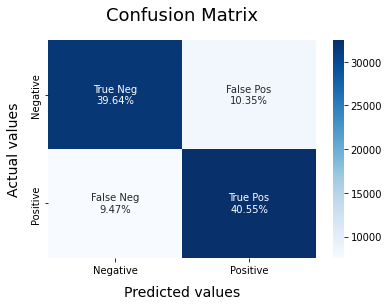

In [40]:
BNBmodel = BernoulliNB(alpha=2)
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)

#### 2. LinearSVC Model

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)

#### 3. Logistic Regression Model

              precision    recall  f1-score   support

           0       0.83      0.82      0.83     39989
           1       0.82      0.84      0.83     40011

    accuracy                           0.83     80000
   macro avg       0.83      0.83      0.83     80000
weighted avg       0.83      0.83      0.83     80000



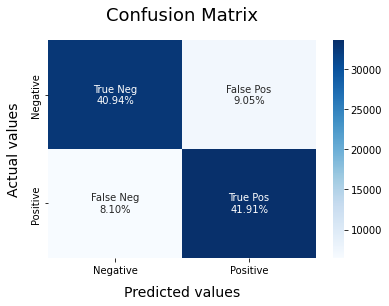

In [42]:
LRmodel = LogisticRegression(C=2, max_iter=1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)

We can clearly see that the Logistic Regression Model performs the best out of all the different models that we tried. It achieves nearly **82% accuracy** while classifying the sentiment of a tweet.